<a href="https://colab.research.google.com/github/Pranavla/Gender_Recognition/blob/main/Gender_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary libraries and images**

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag
image = cv2.imread("/content/WhatsApp Image 2023-02-07 at 14.14.34.jpeg")

45649168/45649168 [==============================] - 2s 0us/step
[INFO] Initializing gender detection model ..


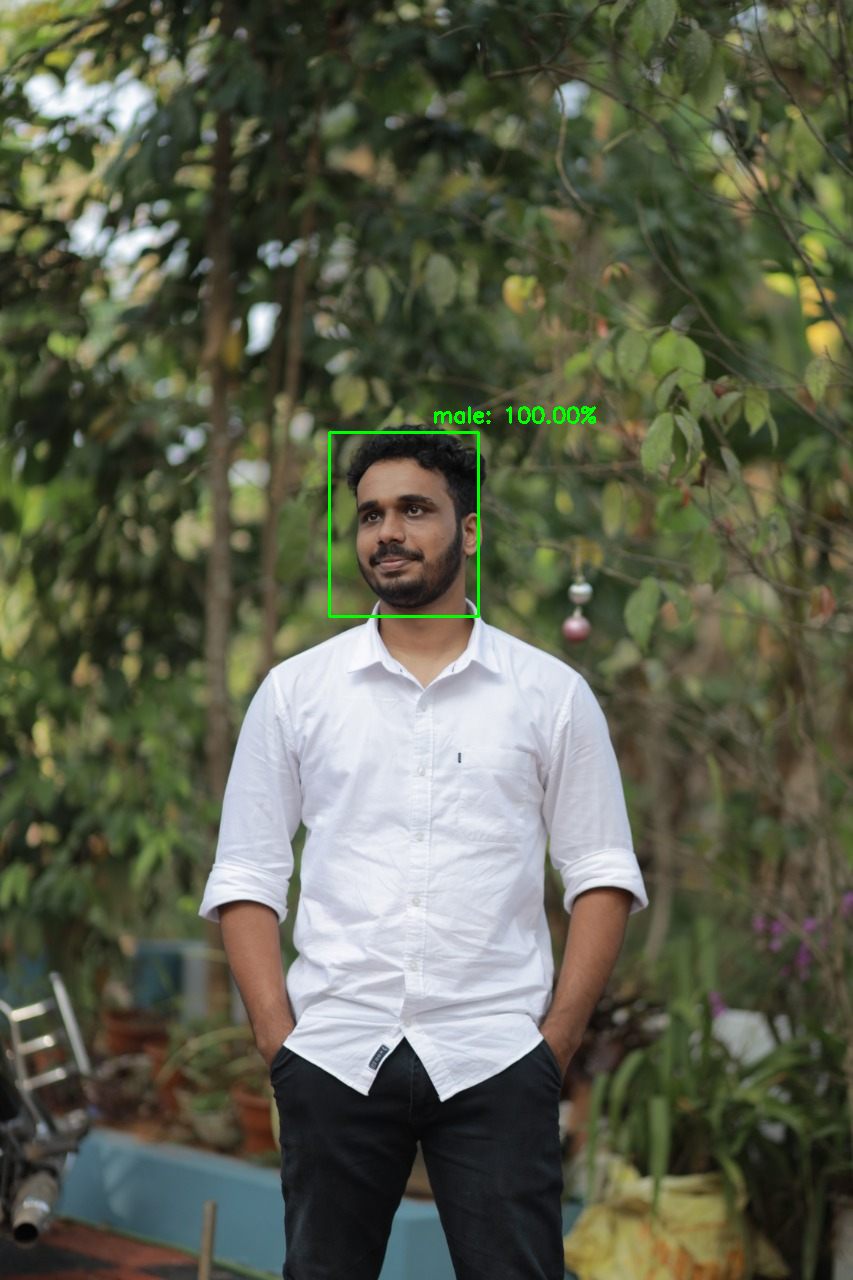

In [ ]:
face, confidence = cv.detect_face(image)
padding = 20

for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
    cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
    crop = np.copy(image[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

Here I have used the OpenCV library to perform face detection and gender classification on an image. The first step is to import the necessary libraries and create a new instance of the cv2 class. The code then uses the detect_face() function to locate the face in the image and calculates the coordinates of the bottom-left corner of the face. Using these coordinates, the code draws a rectangle around each face in the image with a width and height determined by multiplying the face's dimensions by a certain percentage. The final step is to crop the image so that only the face remains, and use the detect_gender() function to determine the gender of the face. The function returns a tuple with the label and confidence of its prediction.